Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing train CSV file
df = pd.read_csv('train.csv')


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking the data for null values or Zero values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


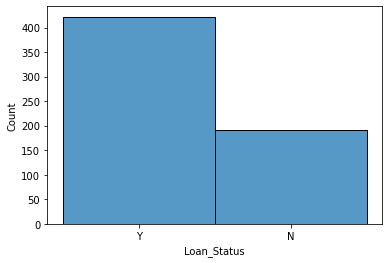

In [6]:
#Plot about outcome of train data
sns.histplot(df['Loan_Status'])
plt.show()

In [7]:
#info about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:xlabel='Education', ylabel='count'>

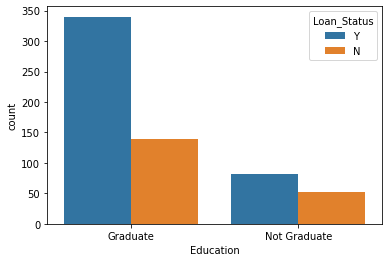

In [8]:
#Insight about  Education vs Loan status
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

Graduated People tend to apply for loan 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

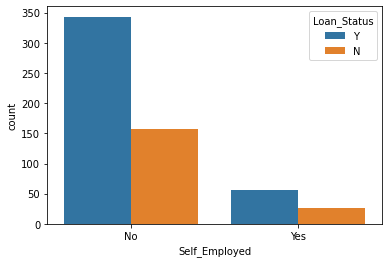

In [9]:
#based on employment people applying for loan or their loan status
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

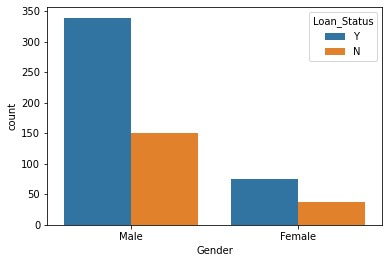

In [10]:
#based on gender loan status 
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

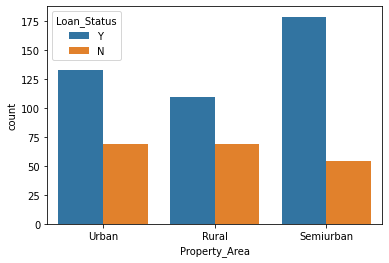

In [11]:
#since the data is about home loan so house location  is important  
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='count'>

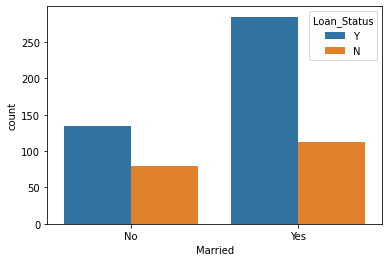

In [12]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

In [13]:
dict1 = {'Graduate':1,'Not Graduate': 0}

In [14]:
df['Education']=df['Education'].replace(dict1)

In [15]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
dict2 = {'Yes':1,'No':2}

In [17]:
df['Married']=df['Married'].replace(dict2)

In [18]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,2.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Male,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,2.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
dict3 = {'Male':1,'Female':0}
df['Gender']=df['Gender'].replace(dict3)

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,2.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,1.0,2.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,2.0,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,1.0,1.0,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,1.0,1.0,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,1.0,1.0,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
dict4={'Yes':1,'No':0}
df['Self_Employed']=df['Self_Employed'].replace(dict4)

In [23]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
df.describe()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,306.500000,0.813644,1.348609,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,177.390811,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,0.000000,1.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,153.250000,1.000000,1.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,306.500000,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,459.750000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,613.000000,1.000000,2.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
del df['Dependents']

In [26]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,2.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,1.0,2.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,2.0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(7), int32(1), int64(2), object(2)
memory usage: 55.3+ KB


In [28]:
df['Urban']=df['Property_Area'].apply(lambda x : 1 if 'Urban' in x else 0)
df['Semi-Urban']=df['Property_Area'].apply(lambda x: 1 if 'Semiurban' in x else 0)
df['Rural']=df['Property_Area'].apply(lambda x: 1 if 'Rural' in x else 0)

In [29]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Urban,Semi-Urban,Rural
0,0,1.0,2.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,0,1
2,2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0
3,3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0
4,4,1.0,2.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,2.0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,1
610,610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y,0,0,1
611,611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y,1,0,0
612,612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y,1,0,0


In [30]:
del df['Property_Area']

In [31]:
df['Loan_Status']= le.fit_transform(df['Loan_Status'])

In [32]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Urban,Semi-Urban,Rural
0,0,1.0,2.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1,0,0
1,1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,0,0
3,3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0
4,4,1.0,2.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,2.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0,0,1
610,610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0,1
611,611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1,0,0
612,612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Loan_Status        614 non-null    int32  
 11  Urban              614 non-null    int64  
 12  Semi-Urban         614 non-null    int64  
 13  Rural              614 non-null    int64  
dtypes: float64(7), int32(2), int64(5)
memory usage: 62.5 KB


In [34]:
df['LoanAmount']=df['LoanAmount'].replace('NaN',146.412162)

In [35]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Urban,Semi-Urban,Rural
0,0,1.0,2.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1,0,0
1,1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,0,0
3,3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0
4,4,1.0,2.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.0,2.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0,0,1
610,610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0,1
611,611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1,0,0
612,612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1,0,0


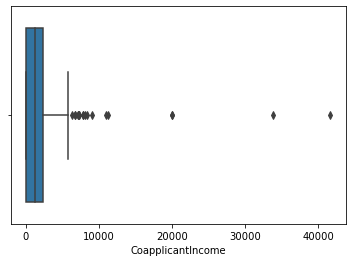

In [36]:
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

In [37]:
df.drop(df[(df['CoapplicantIncome']>7000)].index,inplace=True)

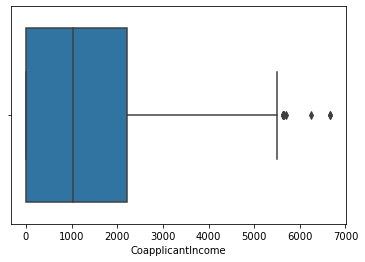

In [38]:
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

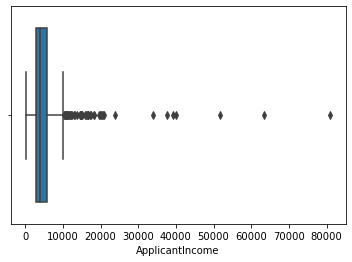

In [39]:
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

In [40]:
df.drop(df[(df['ApplicantIncome']>9000)].index,inplace=True)

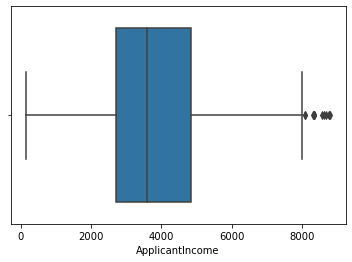

In [41]:
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

In [42]:
df.describe()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Urban,Semi-Urban,Rural
count,532.000000,524.000000,530.000000,532.000000,503.000000,532.000000,532.000000,513.000000,518.000000,487.000000,532.00000,532.000000,532.000000,532.000000
mean,306.148496,0.812977,1.350943,0.753759,0.115308,3936.496241,1418.011128,128.327485,342.972973,0.837782,0.68985,0.319549,0.383459,0.296992
std,177.846679,0.390303,0.477716,0.431226,0.319711,1641.744582,1492.935074,50.992321,65.540184,0.369029,0.46299,0.466741,0.486686,0.457363
min,0.000000,0.000000,1.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,153.750000,1.000000,1.000000,1.000000,0.000000,2719.500000,0.000000,99.000000,360.000000,1.000000,0.00000,0.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,1.000000,0.000000,3590.500000,1405.500000,122.000000,360.000000,1.000000,1.00000,0.000000,0.000000,0.000000
75%,459.250000,1.000000,2.000000,1.000000,0.000000,4847.250000,2303.000000,153.000000,360.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,613.000000,1.000000,2.000000,1.000000,1.000000,8799.000000,6666.000000,376.000000,480.000000,1.000000,1.00000,1.000000,1.000000,1.000000


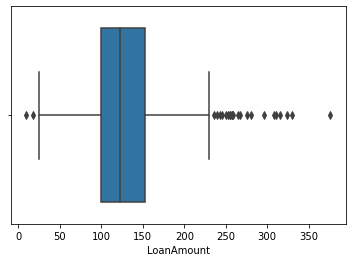

In [43]:
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [44]:
df.drop(df[(df['LoanAmount']>250)].index,inplace=True)

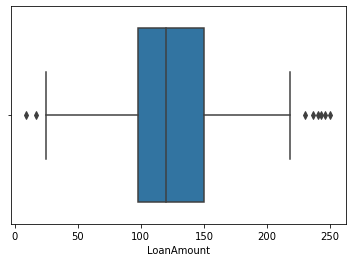

In [45]:
sns.boxplot(x= df['LoanAmount'])
plt.show()

In [46]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0.0,1429.562466)

In [47]:
df.describe()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Urban,Semi-Urban,Rural
count,514.000000,506.000000,512.000000,514.000000,486.000000,514.000000,514.000000,495.000000,500.000000,473.000000,514.000000,514.000000,514.000000,514.000000
mean,306.931907,0.810277,1.353516,0.745136,0.115226,3846.007782,1955.508099,122.610101,342.360000,0.837209,0.694553,0.315175,0.385214,0.299611
std,177.661080,0.392470,0.478529,0.436209,0.319624,1570.037348,973.295366,41.466140,66.630546,0.369565,0.461045,0.465038,0.487120,0.458534
min,0.000000,0.000000,1.000000,0.000000,0.000000,150.000000,16.120001,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,1.000000,0.000000,0.000000,2698.250000,1429.562466,98.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,308.000000,1.000000,1.000000,1.000000,0.000000,3516.000000,1429.562466,120.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,459.750000,1.000000,2.000000,1.000000,0.000000,4691.750000,2229.750000,150.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,613.000000,1.000000,2.000000,1.000000,1.000000,8750.000000,6666.000000,250.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df.rename(columns={'Semi-Urban':'Semi_Urban'}, inplace=True)

In [49]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0.0,1365.883113)

In [50]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Urban,Semi_Urban,Rural
0,0,1.0,2.0,1,0.0,5849,1429.562466,NaN,360.0,1.0,1,1,0,0
1,1,1.0,1.0,1,0.0,4583,1508.000000,128.0,360.0,1.0,0,0,0,1
2,2,1.0,1.0,1,1.0,3000,1429.562466,66.0,360.0,1.0,1,1,0,0
3,3,1.0,1.0,0,0.0,2583,2358.000000,120.0,360.0,1.0,1,1,0,0
4,4,1.0,2.0,1,0.0,6000,1429.562466,141.0,360.0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,608,1.0,1.0,1,0.0,3232,1950.000000,108.0,360.0,1.0,1,0,0,1
609,609,0.0,2.0,1,0.0,2900,1429.562466,71.0,360.0,1.0,1,0,0,1
610,610,1.0,1.0,1,0.0,4106,1429.562466,40.0,180.0,1.0,1,0,0,1
612,612,1.0,1.0,1,0.0,7583,1429.562466,187.0,360.0,1.0,1,1,0,0


In [51]:
df['LoanAmount'].dtype

dtype('float64')

In [52]:
df['LoanAmount']=df['LoanAmount'].replace(np.NaN,122.610101)

In [53]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Urban,Semi_Urban,Rural
0,0,1.0,2.0,1,0.0,5849,1429.562466,122.610101,360.0,1.0,1,1,0,0
1,1,1.0,1.0,1,0.0,4583,1508.000000,128.000000,360.0,1.0,0,0,0,1
2,2,1.0,1.0,1,1.0,3000,1429.562466,66.000000,360.0,1.0,1,1,0,0
3,3,1.0,1.0,0,0.0,2583,2358.000000,120.000000,360.0,1.0,1,1,0,0
4,4,1.0,2.0,1,0.0,6000,1429.562466,141.000000,360.0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,608,1.0,1.0,1,0.0,3232,1950.000000,108.000000,360.0,1.0,1,0,0,1
609,609,0.0,2.0,1,0.0,2900,1429.562466,71.000000,360.0,1.0,1,0,0,1
610,610,1.0,1.0,1,0.0,4106,1429.562466,40.000000,180.0,1.0,1,0,0,1
612,612,1.0,1.0,1,0.0,7583,1429.562466,187.000000,360.0,1.0,1,1,0,0


# Correlation

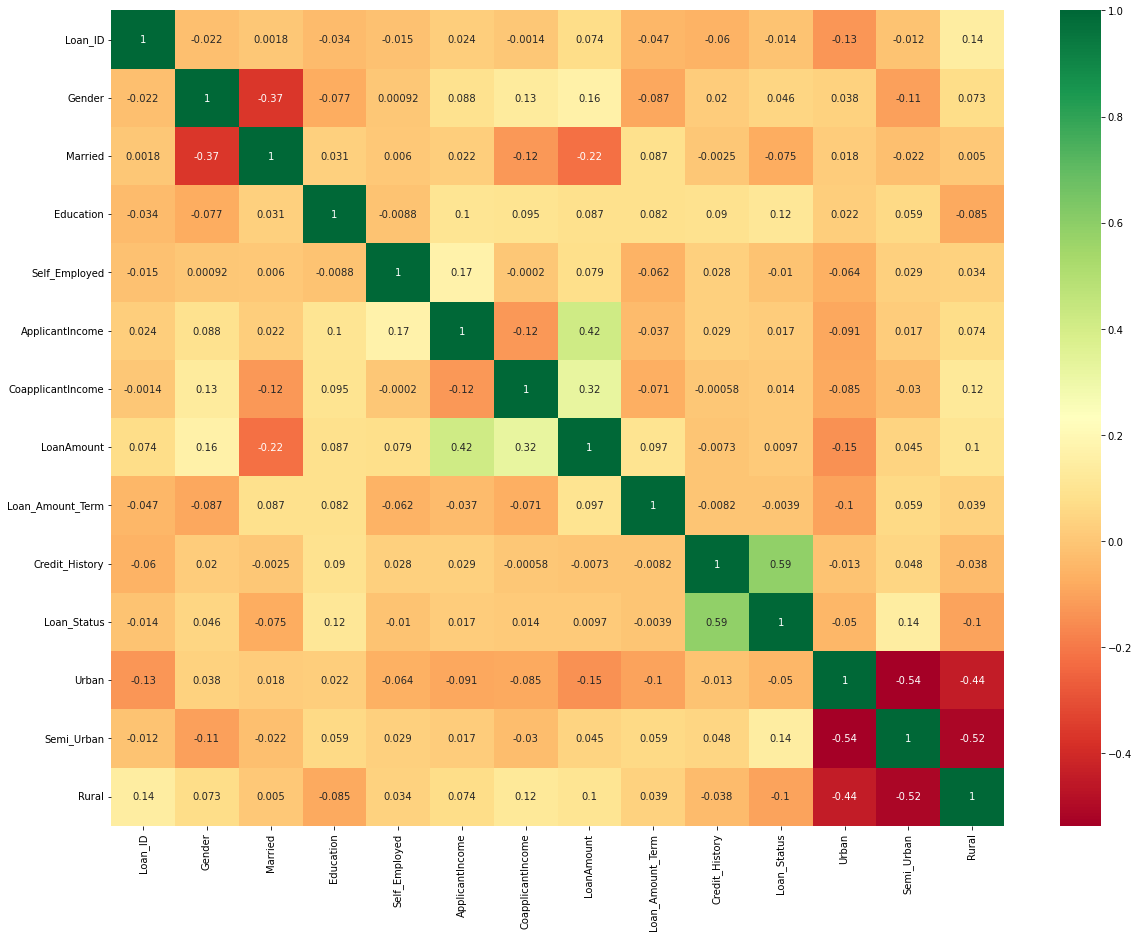

In [54]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [55]:
df.isnull().sum()

Loan_ID               0
Gender                8
Married               2
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       41
Loan_Status           0
Urban                 0
Semi_Urban            0
Rural                 0
dtype: int64

In [56]:
df['Gender'].unique()

array([ 1.,  0., nan])

In [57]:
df['Gender'] = df['Gender'].replace(np.NaN,df['Gender'].mode()[0])

In [58]:
df['Gender'].unique()

array([1., 0.])

In [59]:
df['Self_Employed'].unique()

array([ 0.,  1., nan])

In [60]:
df['Self_Employed'] = df['Self_Employed'].replace(np.NaN,df['Self_Employed'].mode()[0])

In [61]:
df['Self_Employed'].unique()

array([0., 1.])

In [62]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [63]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.NaN,342.36)

In [64]:
df['Loan_Amount_Term'].unique()

array([360.  , 120.  , 240.  , 342.36, 180.  ,  60.  , 300.  , 480.  ,
        36.  ,  84.  ,  12.  ])

In [65]:
df['Credit_History'].unique() 

array([ 1.,  0., nan])

In [66]:
df['Credit_History'] = df['Credit_History'].replace(np.NaN,df['Credit_History'].mode()[0])

In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              2
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Urban                0
Semi_Urban           0
Rural                0
dtype: int64

In [68]:
df['Married'].unique() 

array([ 2.,  1., nan])

In [69]:
df['Married']=df['Married'].replace(np.NaN,df['Married'].mode()[0])

In [70]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Urban                0
Semi_Urban           0
Rural                0
dtype: int64

# Train and Test Split

In [71]:
X= df.drop(columns=['Loan_Status'])

In [72]:
Y = df['Loan_Status']

In [73]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status, Length: 514, dtype: int32

##Decision Tree Classifier

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

# Implenting Algorithms

In [75]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [76]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [77]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
confusion_matrix(y_train, y_train_pred)

array([[ 55,  60],
       [  0, 270]], dtype=int64)

In [80]:
confusion_matrix(y_test, y_test_pred)

array([[19, 23],
       [ 5, 82]], dtype=int64)

In [81]:
accuracy_score(y_test, y_test_pred)

0.7829457364341085

Bagging 

In [82]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [85]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [86]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[19, 23],
       [10, 77]], dtype=int64)

In [87]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.7441860465116279

Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [90]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [91]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[19, 23],
       [ 7, 80]], dtype=int64)

In [92]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.7674418604651163

##Grid Search

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [95]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [96]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [97]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [98]:
grid_search.best_params_ 

{'max_features': 7, 'min_samples_split': 3}

In [99]:
cvrf_clf = grid_search.best_estimator_

In [100]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.7596899224806202

In [101]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[19, 23],
       [ 8, 79]], dtype=int64)

For Application Creation

In [102]:
import pickle

In [103]:
pickle.dump(cvrf_clf,open('model.pkl','wb'))

In [104]:
model = pickle.load(open('model.pkl','rb'))

In [105]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=7, min_samples_split=3, n_estimators=250,
                       random_state=42)

In [106]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Urban', 'Semi_Urban', 'Rural'],
      dtype='object')

In [112]:
l

TypeError: 'Index' object is not callable